## Module_3:

## Team Members: 
*Ashwin Kasamshetty and Porter Jurica*


## Project Title: 
Understanding Apoptosis Evasion in Breast Invasive Carcinoma Using TCGA RNA-seq Data




## Project Goal:
The goal of this project is to explore how breast invasive carcinoma (BRCA) cells avoid programmed cell death by analyzing the expression of apoptosis-related genes in TCGA RNA-seq data. By connecting molecular data with clinical outcomes, this project aims to understand how key genes like TP53 and BCL2 contribute to tumor survival and therapy resistance.

## Disease Background:

* Cancer hallmark focus: Evading Apoptosis

Apoptosis, also known as programmed cell death, eliminates damaged or abnormal cells and prevents tumor formation. Cancer cells often disable this process, enabling survival despite stress or DNA damage. The intrinsic pathway relies on mitochondrial signals and BCL-2 family proteins, while the extrinsic pathway uses death receptors like FAS. When these systems are blocked, tumor cells resist chemotherapy and continue to grow unchecked.
This project examines several apoptosis regulators found in the dataset:

- TP53: Activates pro-death genes (PUMA, NOXA, BAX); mutations disable apoptosis
- BCL2, BCL2L1, MCL1: Block mitochondrial cell death; overexpression promotes survival
- BAX, BAK1: Pro-apoptotic proteins that trigger mitochondrial permeabilization
- FAS, FASLG: Mediate extrinsic apoptosis; often downregulated in tumors
- CASP8, CASP9, CASP3: Execute apoptosis through caspase cascades
- PIK3CA, AKT1, MTOR, PTEN: Drive pro-survival signaling through PI3K–AKT–mTOR
- BECN1: Connects apoptosis and autophagy; its loss enhances tumor protection

* Focus Cancer type: Breast Invasive Carcinoma

Breast Invasive Carcinoma (BRCA) — the most common cancer among women worldwide and a leading cause of cancer-related death.

* Prevalence & incidence: 

Breast invasive carcinoma accounts for over 2 million new cases and approximately 685,000 deaths annually worldwide. It affects about one in eight women in the United States during their lifetime. While early detection has improved outcomes, aggressive subtypes such as triple-negative breast cancer (TNBC) have poor survival rates due to apoptosis resistance and limited targeted treatment options.

* Risk factors (genetic, lifestyle) & Societal determinants

Genetic predispositions, especially BRCA1 and BRCA2 mutations, increase risk and disrupt DNA repair mechanisms that interact with apoptosis control. Lifestyle factors such as alcohol consumption, obesity, and prolonged estrogen exposure further elevate risk. Socioeconomic disparities, lack of screening access, and healthcare inequities contribute significantly to delayed diagnosis and worse outcomes, especially in underserved communities.

* Standard of care treatments (& reimbursement) 

Treatment strategies depend on tumor subtype and stage. Localized tumors are typically treated through surgery, followed by radiation and adjuvant chemotherapy. Systemic therapies include hormone therapy, HER2-targeted agents, and CDK4/6 inhibitors. Resistance to apoptosis limits the success of these treatments, prompting development of novel therapies such as BH3 mimetics (targeting BCL2 family proteins) and PI3K–AKT–mTOR inhibitors. These are increasingly covered by insurance and integrated into precision oncology care.

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

In normal breast tissue, apoptosis regulates ductal development and tissue renewal. In cancerous tissue, TP53 mutations prevent the elimination of abnormal cells, while BCL2 and MCL1 overexpression stabilize mitochondria and inhibit cytochrome c release. Enhanced PI3K–AKT–mTOR activity promotes growth and suppresses apoptotic signaling. Together, these molecular disruptions allow tumor cells to avoid programmed death, survive under therapy-induced stress, and acquire resistance to treatment.


## Data-Set: 

This project will analyze publicly available data from The Cancer Genome Atlas (TCGA), a large-scale initiative conducted by the National Cancer Institute and National Human Genome Research Institute that collected genomic and clinical information across more than 30 cancer types. The subset utilized is compiled in GSE62944, which provides RNA-seq gene expression and clinical metadata for thousands of TCGA samples. 
The RNA-seq data were generated using Illumina HiSeq technology and are reported as log2-transformed Transcripts Per Million (TPM), allowing comparison of expression levels across genes and samples. Clinical data include key variables such as age at diagnosis, tumor stage, vital status, and days to death. This analysis focuses on Breast Invasive Carcinoma (BRCA) samples, examining expression of apoptosis-related genes (TP53, BCL2, CASP8, and others) and their relationships to clinical outcomes. The TCGA expression and metadata provide a foundation for studying how breast tumors evade apoptosis at the molecular level.

## Data Analyis: 

### Methods
The machine learning technique we are using is: Supervised Logistic regression with elastic net-regularization

Optimization: We’re training a model that adjusts gene weights to lower the logistic loss (be right and confident) while using an elastic-net penalty to stay simple and avoid overfitting, with class weights so “Dead” cases matter. 

Is it "good enough:" The model is judged “good enough” using performance on data it hasn’t seen. First, we run stratified k-fold cross-validation and choose hyperparameters that maximize ROC-AUC, while also monitoring PR-AUC because the “Dead” class is rare. Next, we evaluate the finalized model once on a held-out test set and expect its ROC-AUC to be close to the cross-validation average and clearly better than simple baselines (like predicting the majority class or a clinical-only model). We also check stability and simplicity: coefficients and permutation importances should be reasonably consistent across folds, and elastic-net regularization should keep weights from becoming extreme. When needed, we verify probability calibration with a reliability curve or Brier score to ensure higher scores reflect higher risk. Finally, the optimizer must converge without warnings, and small resplits should yield similar results; if these checks fail, we adjust features or regularization and try again.

### Analysis

Analysis of data: We aligned TCGA sample barcodes between the RNA-seq expression matrix and the clinical metadata, then filtered the cohort to BRCA primary tumors (sample type 01). We created a binary outcome label from vital_status (Alive=0, Dead=1) and retained only samples present in both tables. As features, we selected a curated apoptosis gene panel (TP53, BAX/BAK1, BCL2 family, FAS/FASLG, CASP3/8/9, PTEN–PI3K–AKT–MTOR, BECN1) and standardized them within a scikit-learn pipeline. We then trained a logistic regression with elastic-net regularization (class_weight="balanced") using a train/test split and computed ROC-AUC and PR-AUC on the held-out test set. Finally, generated ROC and precision-recall plots, a confusion matrix, and exported model coefficients and permutation importances to interpret which genes increased or decreased the odds of death.

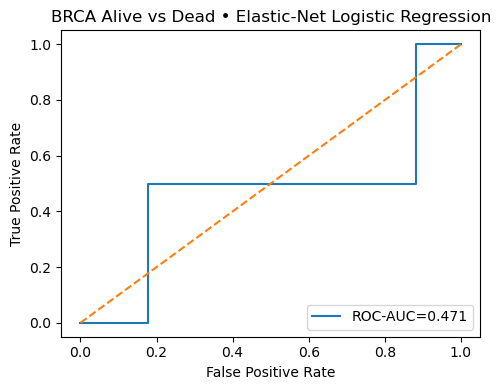

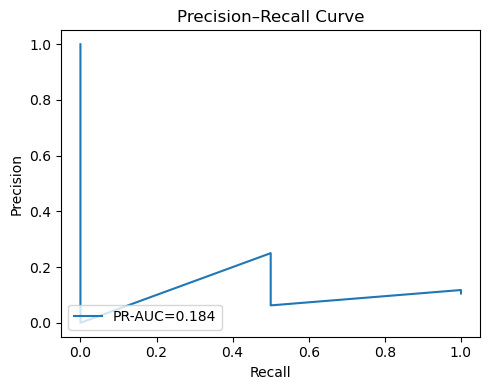


Label counts: {0: 69, 1: 7}
ROC-AUC: 0.471 PR-AUC: 0.184

Top 10 coefficients by |weight|:
    gene  coefficient                  direction  abs_rank
   XIAP     1.529955 higher → higher death odds         1
   BAK1     1.375967 higher → higher death odds         2
  CFLAR    -0.909280  higher → lower death odds         3
 PMAIP1    -0.701371  higher → lower death odds         4
TNFSF10    -0.671854  higher → lower death odds         5
BCL2L11    -0.664414  higher → lower death odds         6
   PTEN     0.650896 higher → higher death odds         7
    BID    -0.637934  higher → lower death odds         8
  CASP9     0.606141 higher → higher death odds         9
    BAD     0.520193 higher → higher death odds        10

Confusion matrix:
                Pred_Alive(0)  Pred_Dead(1)
True_Alive(0)             14             3
True_Dead(1)               1             1


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.inspection import permutation_importance
from IPython.display import Image, display

EXP_PATH  = "GSE62944_subsample_log2TPM.csv"
META_PATH = "GSE62944_metadata.csv"

expr = pd.read_csv(EXP_PATH)
meta = pd.read_csv(META_PATH)

gene_col = "Unnamed: 0" if "Unnamed: 0" in expr.columns else expr.columns[0]
expr = expr.set_index(gene_col)
expr.columns = [c[:16] if isinstance(c, str) and c.startswith("TCGA-") else c for c in expr.columns]

meta["barcode16"] = meta["sample"].astype(str).str[:16]
brca_meta = meta[meta["cancer_type"].astype(str).str.upper() == "BRCA"].copy()

def is_primary(b16: str) -> bool:
    if not isinstance(b16, str): 
        return False
    parts = b16.split("-")
    return len(parts) >= 4 and parts[3].startswith("01")

brca_meta = brca_meta[brca_meta["barcode16"].map(is_primary)]

common = sorted(set(expr.columns) & set(brca_meta["barcode16"]))
X_expr = expr[common].T
brca_meta = brca_meta.set_index("barcode16").loc[common]

y = (
    brca_meta["vital_status"]
    .astype(str).str.strip().str.lower()
    .map({"alive": 0, "dead": 1})
    .dropna()
    .astype(int)
)
X_expr = X_expr.loc[y.index]

apoptosis_genes = [
    "TP53","BAX","BAK1","BAD","BID","BCL2","BCL2L1","BCL2L11","MCL1",
    "BBC3","PMAIP1","APAF1","CYCS","DIABLO","XIAP","BIRC2","BIRC3","CFLAR",
    "FAS","FASLG","TNFSF10","TNFRSF10A","TNFRSF10B",
    "CASP3","CASP8","CASP9",
    "PIK3CA","AKT1","MTOR","PTEN","BECN1"
]
genes_used = [g for g in apoptosis_genes if g in X_expr.columns]
X = X_expr[genes_used].copy().replace([np.inf, -np.inf], np.nan).dropna(axis=0, how="any")
y = y.loc[X.index]

strat = y if y.value_counts().min() >= 2 else None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=strat)

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True)),
    ("clf", LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        l1_ratio=0.5,
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        n_jobs=1,
        random_state=42
    ))
])

pipe.fit(X_train, y_train)

proba = pipe.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, proba)
pr_auc  = average_precision_score(y_test, proba)

fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("BRCA Alive vs Dead • Elastic-Net Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("brca_pathA_roc.png", dpi=160)
plt.show()
plt.close()

prec, rec, _ = precision_recall_curve(y_test, proba)
plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig("brca_pathA_pr.png", dpi=160)
plt.show()
plt.close()

y_pred = (proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index=["True_Alive(0)","True_Dead(1)"], columns=["Pred_Alive(0)","Pred_Dead(1)"])
cm_df.to_csv("brca_pathA_confusion.csv")

clf = pipe.named_steps["clf"]
coef_df = pd.DataFrame({"gene": X.columns, "coefficient": clf.coef_.ravel()})
coef_df["direction"] = np.where(coef_df["coefficient"]>0, "higher → higher death odds", "higher → lower death odds")
coef_df["abs_rank"] = coef_df["coefficient"].abs().rank(method="dense", ascending=False).astype(int)
coef_df = coef_df.sort_values("abs_rank")
coef_df.to_csv("brca_pathA_coef.csv", index=False)

pi = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=0, scoring="roc_auc")
pi_df = pd.DataFrame({"gene": X.columns, "pi_mean": pi.importances_mean, "pi_std": pi.importances_std}).sort_values("pi_mean", ascending=False)
pi_df.to_csv("brca_pathA_permutation_importance.csv", index=False)

with open("brca_pathA_metrics.json","w") as f:
    json.dump({
        "n_samples_total": int(len(X)),
        "n_features": int(X.shape[1]),
        "label_counts": {str(int(k)): int(v) for k, v in y.value_counts().to_dict().items()},
        "test_roc_auc": float(roc_auc),
        "test_pr_auc": float(pr_auc),
        "artifacts": {
            "roc_png": "brca_pathA_roc.png",
            "pr_png": "brca_pathA_pr.png",
            "confusion_csv": "brca_pathA_confusion.csv",
            "coefficients_csv": "brca_pathA_coef.csv",
            "permutation_importance_csv": "brca_pathA_permutation_importance.csv"
        }
    }, f, indent=2)

print("\nLabel counts:", y.value_counts().to_dict())
print("ROC-AUC:", round(roc_auc, 3), "PR-AUC:", round(pr_auc, 3))
print("\nTop 10 coefficients by |weight|:\n", coef_df.head(10).to_string(index=False))
print("\nConfusion matrix:\n", cm_df.to_string())


We evaluated model performance using ROC-AUC and Precision-Recall AUC (PR-AUC) on the held-out test set. Both metrics tend to range from 0 to 1 with 0.5 implying random chance. In testing, ROC-AUC ≈ 0.47 and PR-AUC ≈ 0.18. These values imply limited predictive power. We also report a confusion matrix at a 0.5 threshold, but conclusions are based on threshold-independent AUCs.
Given the extreme imbalance and small positive-class size, these results suggest that apoptosis-gene expression alone may not fully predict survival outcome in the current BRCA subset. Additional features (clinical covariates, subtype information, or broader gene panels) and larger sample sizes are needed in order to come to a more comprehensive conclusion. 

## Verify and validate your analysis: 

Verification: 

Using a 75/25 training–test split, model performance was assessed with ROC-AUC and PR-AUC, which evaluate overall ranking ability and minority-class detection, respectively. The model achieved a ROC-AUC of 0.471 and PR-AUC of 0.184, indicating poor discrimination between alive and dead patients. The confusion matrix (1 true death detected, 1 missed) confirms weak performance likely due to strong class imbalance and limited sample size. These results suggest apoptosis-gene expression alone provides insufficient predictive power, and that additional features or resampling methods may be needed to improve accuracy.

External model validation:

Although the model’s predictive accuracy was limited, its top-weighted genes align with established apoptosis mechanisms in breast cancer. XIAP, BAK1, PTEN, and CASP9 were positively associated with death, consistent with evidence linking XIAP overexpression and disrupted apoptotic signaling to poor survival and therapy resistance. Conversely, CFLAR (c-FLIP), PMAIP1 (NOXA), and BCL2L11 (BIM) were negatively weighted, reflecting their pro-apoptotic, tumor-suppressive roles whose reduced activity promotes tumor survival. Overall, these gene patterns agree with literature showing that breast tumors often evade apoptosis by overexpressing inhibitors and downregulating apoptotic mediators.

https://pmc.ncbi.nlm.nih.gov/articles/PMC8200223/ 

https://pmc.ncbi.nlm.nih.gov/articles/PMC4583467/ 

https://www.nature.com/articles/1210220

## Conclusions and Ethical Implications: 

The results show that the model has weak predictive ability, with ROC-AUC = 0.471 and PR-AUC = 0.181. This is likely due to the small sample size and heavy class imbalance. Additionally, apoptosis regulation cannot be summarized by mRNA data on its own. However, the gene coefficients from the logistic regression are biologically valid, as pro-survival genes like XIAP, PTEN, and CASP9 are associated with higher death odds, while pro-apoptotic genes like CFLAR, PMAIP1, and TNFSF10 are associated with lower death odds. This pattern is seen clearly from the directionality of the coefficients. The generated confusion matrix from the test set indicates that the model overpredicts survival and rarely detects the death cases, supporting the fact that more information is necessary for accurate prediction. 

From an ethical standpoint, these results should be utilized only for research and machine learning model improvement, not for any form of patient care. It is important that transparency is maintained about model limitations, not only with this one, but with future predictive models as well. Additionally, recognizing the possibility that the TCGA data might not accurately represet all populations is key, specifically due to the heavy data filtering. Therefore, the model must be validated on diverse populations in order to minimize bias in risk predictions. Because the results rely on genome data, it is imperative that strict privacy protections and consent practices are implemented in any use of specific conclusions. 

## Limitations and Future Work: 

A highly relevant limitation within this model is the fact that the analysis is limited by the small sample size and severe class imbalance. Like previously mentioned, the use of mRNA apoptosis genes only cannot capture the full complexity of brest cancer survival since apoptosis is also regulated at the protein level. Because apoptosis also varies across BRCA subtypes, the weak AUC likely reflects missing clinical and subtype information. 

Any future work should implement larger and more diverse datasets, and potentially implement additional features like BRCA subtypes. Other potential improvements could include selecting a more curated gene panel to analyze rather than a wide range of genes. Additionally, testing more advanced machine learning models like Random Forest, or utilizing a different kind of regularization technique like Lasso or Ridge regression could also provide more significant predictions.

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

10/23 in class:
- Decided on project focus, interest in hallmark of evading apoptosis.
- Began to develop project goal and background information on apoptosis.

10/24 & 10/25 outside of class:
- Investigated which genes related to apoptosis are best available in dataset.
- Worked on describing dataset

10/28 & 10/30:
- learning about machine learning techniques
- chose machine learning technique for our project
- completed mini presentation to company about direction of project

11/6:
- learning about ML validation techniques
- decided which validation is best for logistic regression 
- starting to implement validation in code

11/11:
- learning about regularization techniques
- thinking about potential model improvements to discuss in presentation
- working on project slides for presentation

11/13:
- Presented results in class
- Finished up conclusions/ethical implications and limitations/future work sections for final submission

## QUESTIONS FOR YOUR TA: 

We have no questions or concerns at this time.